# Sentiment Analysis on Amazon Reviews

In [1]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tweepy
import seaborn as sns
import numpy as np
import datetime
import re
from termcolor import colored

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import string 

from sklearn.model_selection import train_test_split

In [2]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
#Downloading files incase running on Colab
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer, PorterStemmer
# porter = PorterStemmer()
# lem = WordNetLemmatizer()
# nltk.download('punkt')

from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jayanti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jayanti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jayanti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jayanti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jayanti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jayanti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
from collections import Counter

<br>

In [5]:
!pip install contractions
import contractions

# Importing the data:

In [6]:
## Import file
path = 'https://raw.githubusercontent.com/jayantibhanushali007/Amazon_Sentiment/main/amazon_reviews.csv'

data = pd.read_csv(path)

print(data.shape)
data.head()

(50000, 3)


,Rating,Title,Review
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [7]:
# Keeping only relevant columns
data = data[['Rating', 'Review']]
data.head(5)

,Rating,Review
0,2,My lovely Pat has one of the GREAT voices of h...
1,2,Despite the fact that I have only played a sma...
2,1,I bought this charger in Jul 2003 and it worke...
3,2,Check out Maha Energy's website. Their Powerex...
4,2,Reviewed quite a bit of the combo players and ...


In [8]:
## Set labels to 0 and 1
def decrease_label_by_one(label):
    return label - 1

data['Rating'] = data['Rating'].apply(decrease_label_by_one)
data.head(5)

,Rating,Review
0,1,My lovely Pat has one of the GREAT voices of h...
1,1,Despite the fact that I have only played a sma...
2,0,I bought this charger in Jul 2003 and it worke...
3,1,Check out Maha Energy's website. Their Powerex...
4,1,Reviewed quite a bit of the combo players and ...


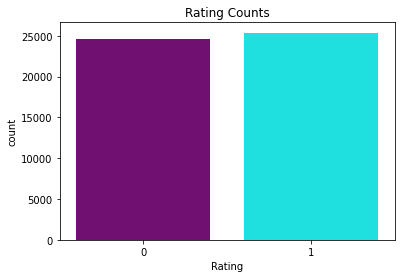

In [9]:
## Count ratings
data.Rating.value_counts(normalize = True)

color_palette = ['purple', 'cyan']
sns.set_palette(color_palette) 
sns.countplot(x=data['Rating'])

plt.title('Rating Counts')
plt.show()

# Data Cleaning & Preparation:

**1. Text Cleaning:**
* Uses regular expressions to remove non-alphanumeric and non-numeric characters from the text.
* Utilizes the contractions library to expand contractions and replace them with their full forms.
* Removes numeric digits from the text.
* Replaces the string " s " with a blank space.
* Converts the entire text to lowercase.

**2. Stopword Removal:**
* Tokenizes the text using the nltk.word_tokenize function to split it into individual words.
* Filters out words from the text to remove those that are present in the set of stopwords (common words that don't contribute much meaning to the analysis).

**3. Text Normalization:**
* Utilizes a stemmer (in this case, the SnowballStemmer) to reduce words to their base or root form.
* Applies the stemmer to each word in the tokenized text.
* Joins the normalized words back together into a text string.

In [10]:
def preprocess_text(text):
    # Text clean
    text = re.sub(r'[\W_]+', ' ', contractions.fix(re.sub(r'\d+', '', text.replace(' s ', ' ')))).lower()

    # Stopword removal
    tokens = nltk.word_tokenize(text)
    text = " ".join([token for token in tokens if token not in stop_words])

    # Data Normalization
    normalized_text = [stemmer.stem(word) for word in text.split()]
    text = ' '.join(normalized_text)

    return text

In [11]:
print(colored('Before of clean:\n', 'blue'), data.Review[8])
print(colored('After of clean:\n', 'blue'), preprocess_text(data.Review[8]))

Before of clean:
 Exotic tales of the Orient from the 1930's. "Dr Shen Fu", a Weird Tales magazine reprint, is about the elixir of life that grants immortality at a price. If you're tired of modern authors who all sound alike, this is the antidote for you. Owen's palette is loaded with splashes of Chinese and Japanese colours. Marvelous.
After of clean:
 exot tale orient dr shen fu weird tale magazin reprint elixir life grant immort price tire modern author sound alik antidot owen palett load splash chines japanes colour marvel


In [12]:
## Cleaning and processing on the Review variable
data['Review'] = data['Review'].apply(preprocess_text)

data.head(10)

,Rating,Review
0,1,love pat one great voic generat listen cd year...
1,1,despit fact play small portion game music hear...
2,0,bought charger jul work ok design nice conveni...
3,1,check maha energi websit powerex mh cf charger...
4,1,review quit bit combo player hesit due unfavor...
5,0,also began incorrect disc problem read vcr sti...
6,0,love style coupl year dvd give problem even wo...
7,0,scroll dvd menu set vertic triangl key select ...
8,1,exot tale orient dr shen fu weird tale magazin...
9,0,first enjoy format tone book author address re...


# Exploratory Data Analysis:

In [13]:
## Frequency Words
words = Counter(' '.join(data['Review'].to_list()).split())
Frequency_words = pd.DataFrame([words]).transpose().reset_index().rename(columns = {'index': 'Words', 0:'Frequency' })
Frequency_words = Frequency_words.sort_values('Frequency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'Rank'})
Frequency_words['Rank'] = Frequency_words['Rank'].apply(lambda x : x+1)
Frequency_words.head(20)

,Rank,Words,Frequency
0,1,book,30727
1,2,one,19730
2,3,like,16626
3,4,read,14724
4,5,movi,14020
5,6,would,13741
6,7,good,12426
7,8,time,11806
8,9,get,11723
9,10,great,11647


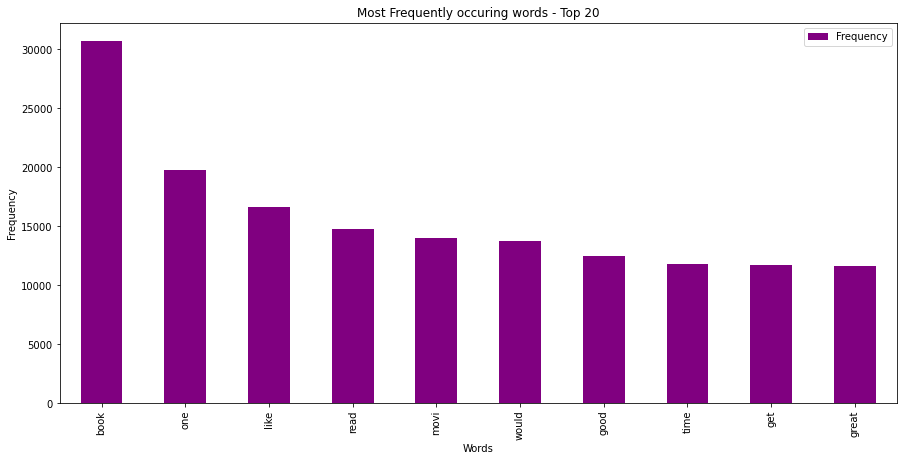

In [14]:
Top10 = Frequency_words[['Words','Frequency']].head(10)
Top10.plot(x="Words", y="Frequency", kind='bar',  figsize=(15,7), color = 'purple')
plt.title("Most Frequently occuring words - Top 20")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [15]:
data.shape

(50000, 2)

## Word Cloud Analysis:

In [16]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            ])
   
    #STOPWORDS = STOPWORDS.extend(stop_words)

    wordcloud = WordCloud(stopwords=stop_words,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [18]:
#Tokenize the Ratings we wish to create ngrams from
Token_data= data.Review.str.split(expand=True).stack()

Word Cloud of Overall Data:


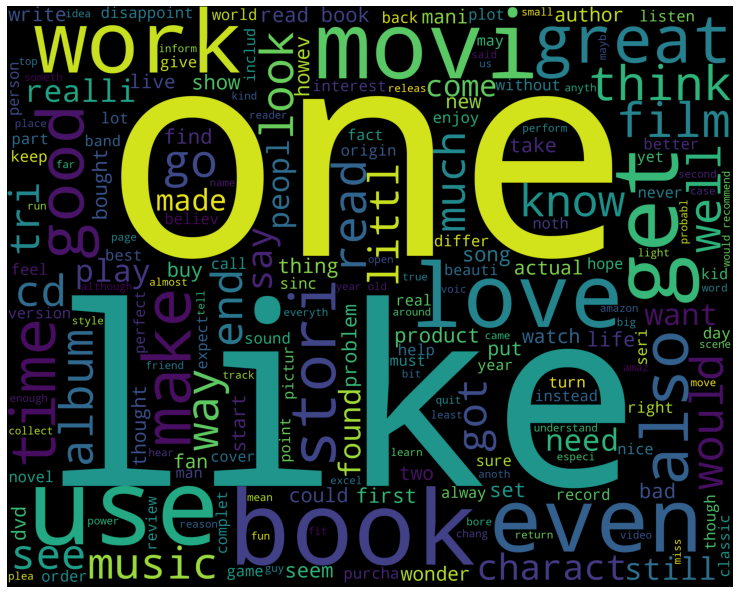

In [19]:
# Wordcloud of complete data.
print("Word Cloud of Overall Data:")
wordcloud_draw(Token_data)

# 1: Unsupervised Sentiment Analysis using VADER algorithm:

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [21]:
analyzer = SentimentIntensityAnalyzer()

In [22]:
VADER_sentiment = data['Review'].apply(lambda x : analyzer.polarity_scores(x))

In [23]:
data_VADER=pd.concat([data,VADER_sentiment.apply(pd.Series)],1)

In [24]:
# creading a new column to transform sentiment score to Negative/Positive
data_VADER.loc[data_VADER['compound'] > 0, 'VADER_predicted_sentiments'] = "Positive"
data_VADER.loc[data_VADER['compound'] == 0, 'VADER_predicted_sentiments'] = "Neutral"
data_VADER.loc[data_VADER['compound'] < 0, 'VADER_predicted_sentiments'] = "Negative"

In [25]:
data_VADER.head()

,Rating,Review,neg,neu,pos,compound,VADER_predicted_sentiments
0,1,love pat one great voic generat listen cd year...,0.104,0.586,0.310,0.9337,Positive
1,1,despit fact play small portion game music hear...,0.087,0.663,0.250,0.9186,Positive
2,0,bought charger jul work ok design nice conveni...,0.000,0.697,0.303,0.8402,Positive
3,1,check maha energi websit powerex mh cf charger...,0.000,0.861,0.139,0.4404,Positive
4,1,review quit bit combo player hesit due unfavor...,0.000,0.793,0.207,0.7845,Positive


In [26]:
#Exporting the VADER scored dataset .csv file
#data_VADER.to_csv("Sentiment_Analysis_VADER.csv", encoding='utf-8', index=False)

In [27]:
neg_polarity = 0
pos_polarity = 0
neutral_polarity = 0

for results in data_VADER['VADER_predicted_sentiments']:
    if (results == 'Negative'): neg_polarity =neg_polarity+1
    if (results == 'Positive'): pos_polarity =pos_polarity+1
    if (results == 'Neutral'): neutral_polarity =neutral_polarity+1

    
neg_polarity = neg_polarity/len(data)
pos_polarity = pos_polarity/len(data)
neutral_polarity = neutral_polarity/len(data)


print("The proportion of Negative Sentiment Score is: ",neg_polarity*100)
print("The proportion of Positive Sentiment Score is: ",pos_polarity*100)
print("The proportion of Neutral Sentiment Score is: ",neutral_polarity*100)


The proportion of Negative Sentiment Score is:  20.066
The proportion of Positive Sentiment Score is:  76.31
The proportion of Neutral Sentiment Score is:  3.624


VADER Algorithm - Word Cloud of Positive Terms:


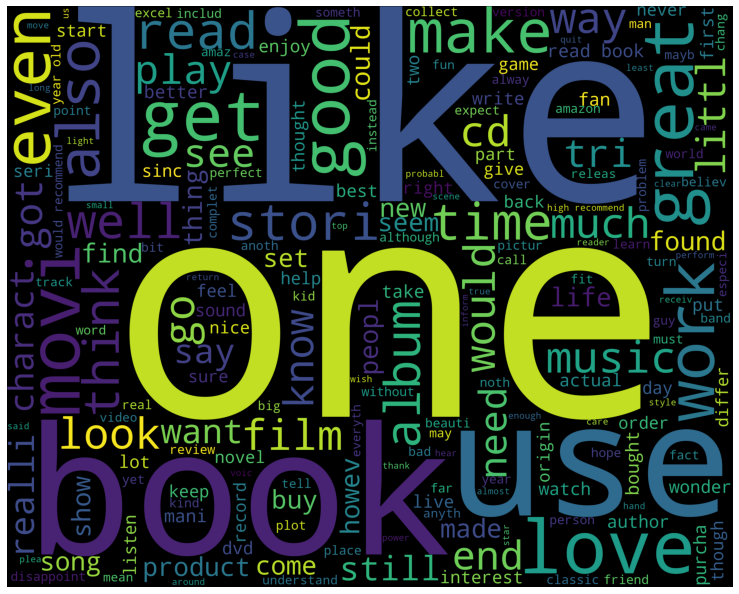

In [28]:
## Visualizing Positive Sentiments:
Token_VADER_Positive= data_VADER[data_VADER['VADER_predicted_sentiments']=="Positive"].Review.str.split(expand=True).stack()

# Wordcloud on actual data.
print("VADER Algorithm - Word Cloud of Positive Terms:")
wordcloud_draw(Token_VADER_Positive)

VADER Algorithm - Word Cloud of Negative Terms:


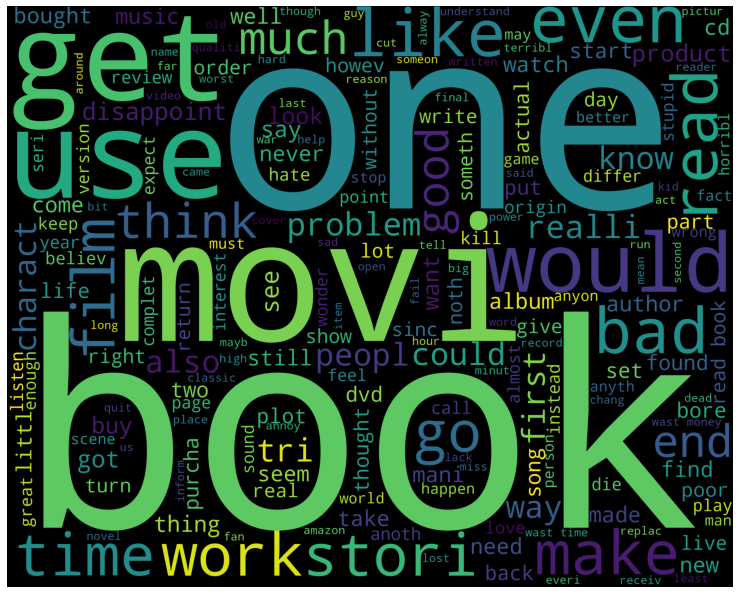

In [29]:
## Visualizing Negative Sentiments:
Token_VADER_Negative= data_VADER[data_VADER['VADER_predicted_sentiments']=="Negative"].Review.str.split(expand=True).stack()

# Wordcloud on actual data.
print("VADER Algorithm - Word Cloud of Negative Terms:")
wordcloud_draw(Token_VADER_Negative)

VADER Algorithm - Word Cloud of Neutral Terms:


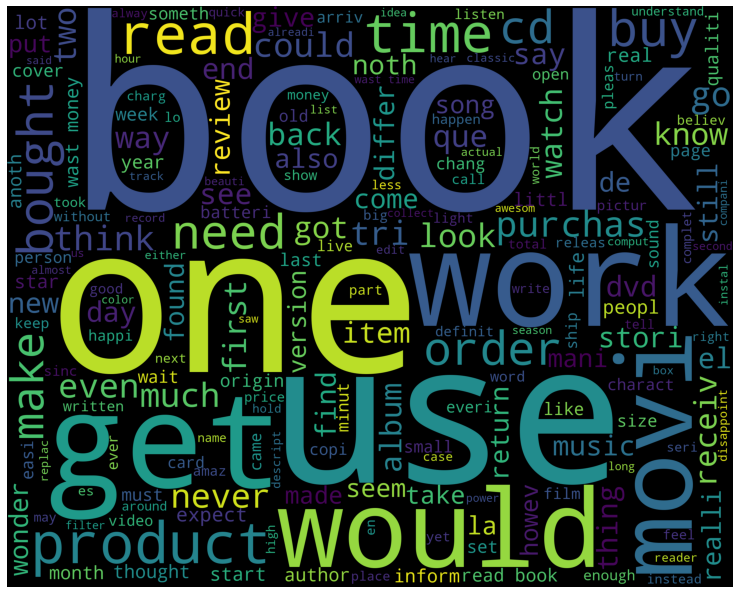

In [30]:
## Visualizing Neutral Sentiments:
Token_VADER_Neutral= data_VADER[data_VADER['VADER_predicted_sentiments']=="Neutral"].Review.str.split(expand=True).stack()

# Wordcloud on actual data.
print("VADER Algorithm - Word Cloud of Neutral Terms:")
wordcloud_draw(Token_VADER_Neutral)